In [42]:
import pandas as pd
import numpy as np

In [43]:
train = pd.read_csv('data/train.csv',index_col = 'id')
test = pd.read_csv('data/test.csv',index_col = 'id')
data = pd.concat([train, test]).drop(columns = 'target')
sample_test = pd.read_csv('data/sample_submission.csv',index_col = 'id')

C:\Alon\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
y_true = pd.Series(0, index = data.index)
y_true.loc[test.index] = 1
y_true.loc[train.index] = 0

# Feture Extraction

## keyword

In [46]:
from feature_extraction.keyword import process_keyword

keyword = data['keyword']
X_keyword = process_keyword(keyword)
# X_keyword.sample(10)

## text

In [47]:
from feature_extraction.text import process_text

text = data['text']
X_text = process_text(text)
# X_text.sample(10)

## combine

In [48]:
from sklearn.model_selection import train_test_split

X_all = X_keyword.join(X_text)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_true, train_size=0.7, shuffle=True)

# Modeling

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [50]:
clf.fit(X_train, y_train)
y_pred_score = clf.predict_proba(X_test)[:, 1]
y_pred = (y_pred_score >= 0.5).astype(int)

# Evaluation

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

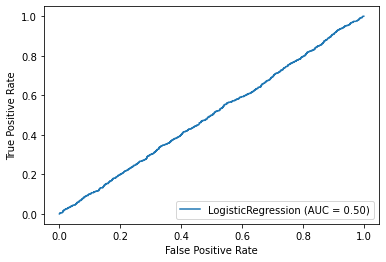

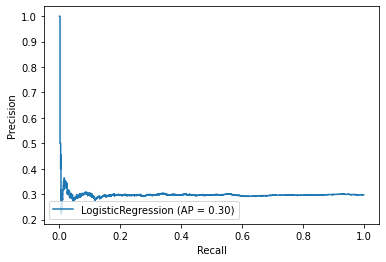

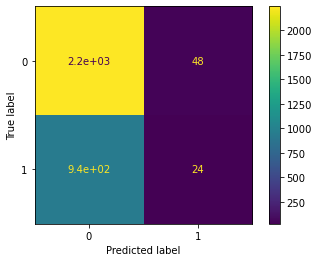

In [52]:
plot_roc_curve(clf, X_test, y_test)
plot_precision_recall_curve(clf, X_test, y_test)
plot_confusion_matrix(clf, X_test, y_test)

# Feature Importances

In [53]:
feature_importances = pd.Series(
    data = clf.coef_[0],
    index = X_all.columns
)

In [54]:
feature_importances.sort_values()

text_staff           -1.245770
text_manifestation   -1.090570
text_trade           -1.042617
text_barracks        -1.018132
text_magnums         -1.005352
                        ...   
text_cousin           1.018905
text_alba             1.051917
text_giving           1.095480
text_kontrolled       1.118056
text_lasts            1.251694
Length: 21019, dtype: float64